In [43]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

## Parsing and cleaning

In [44]:
with open('data_v4.json', encoding="utf-8") as json_file:
    data = json.load(json_file)
df = pd.json_normalize(data)

import math
startdates = pd.to_datetime(df["StartDate"], format='%Y-%m-%d')
df["StartYear"] = [x.year for x in startdates]
df["StartDecade"] = [math.floor(x.year/10)*10 for x in startdates]

<AxesSubplot: xlabel='RegisteredCapital'>

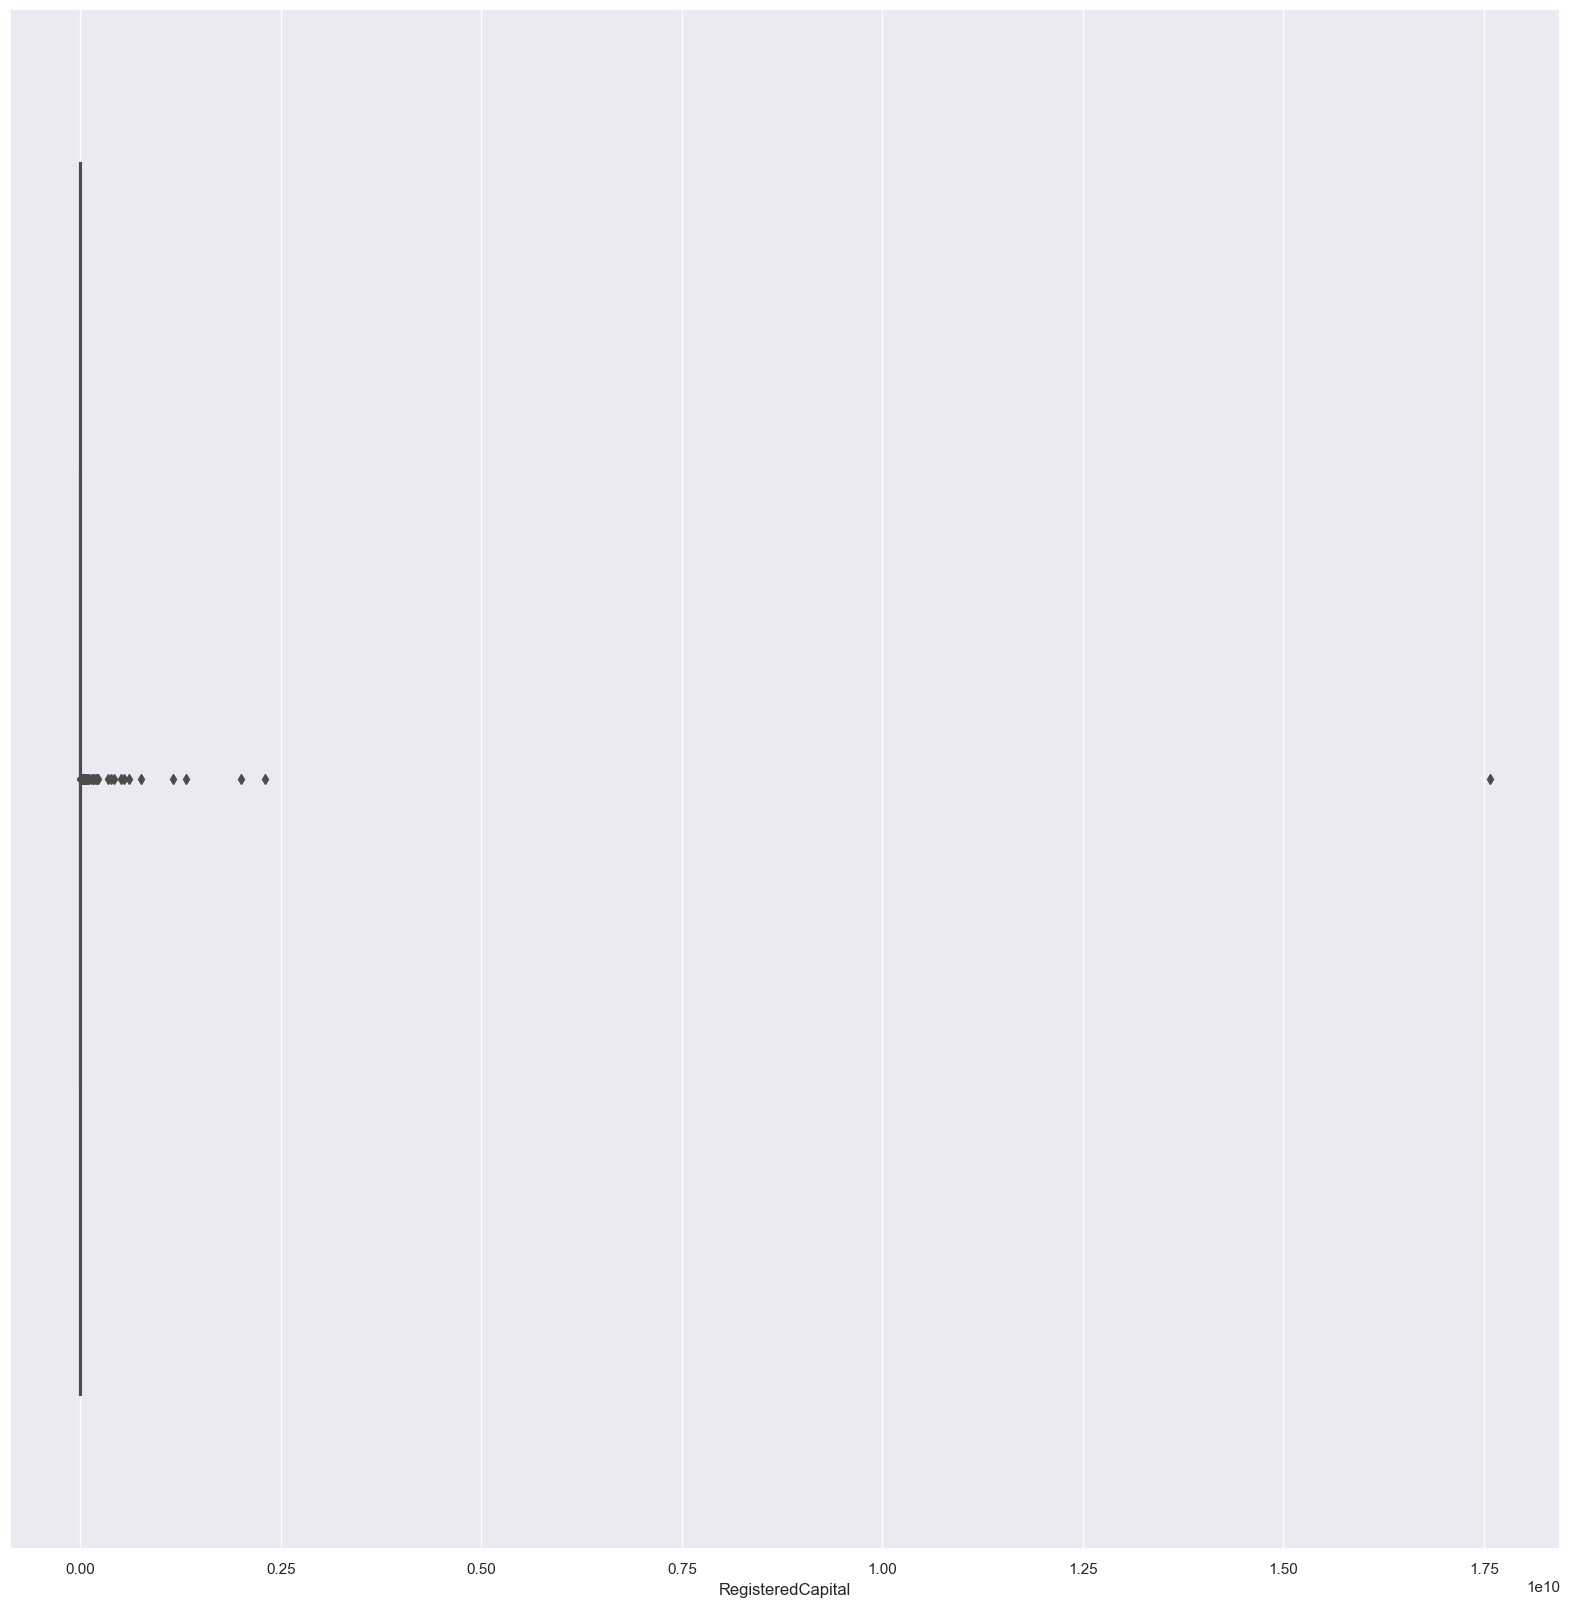

In [45]:
sns.boxplot(x=df["RegisteredCapital"])

In [46]:
#remove outliers
high_perc = np.percentile(df['RegisteredCapital'], 95)
#low_perc = np.percentile(df['RegisteredCapital'], 5)
df = df[(df['RegisteredCapital'] > low_perc) & (df['RegisteredCapital'] < high_perc)]
len(df)

2169

<AxesSubplot: xlabel='RegisteredCapital'>

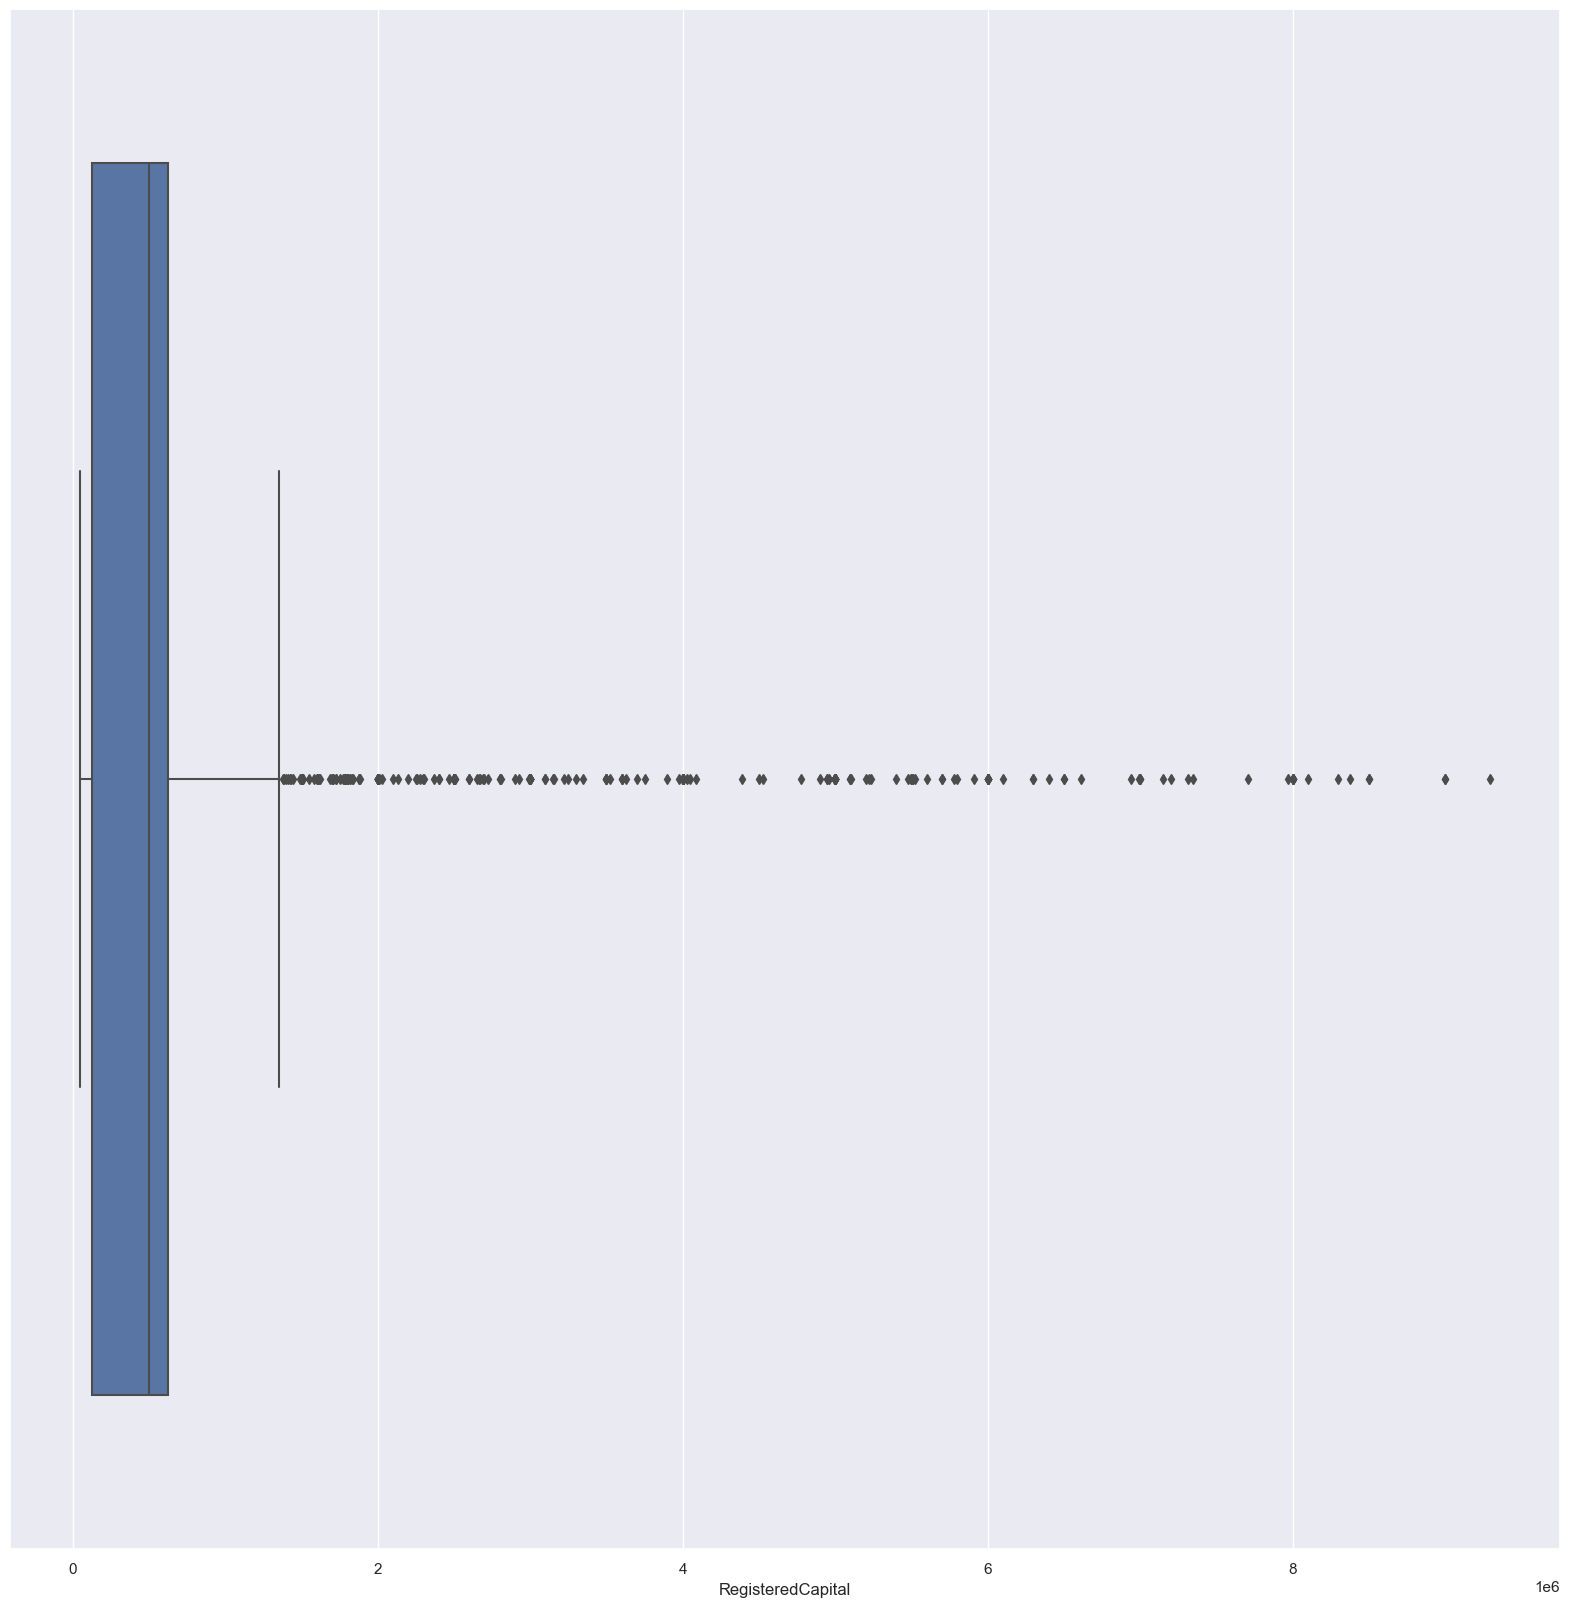

In [47]:
sns.boxplot(x=df["RegisteredCapital"])

In [4]:
industry_codes = pd.read_html('https://dinero.dk/ordbog/branchekode/')[0]
industry_codes.columns = industry_codes.iloc[0]
industry_codes = industry_codes[1:]

industry_df = {
    "IndustryGroup": [],
    "IndustryShortCode": []
}

for index, row in industry_codes.iterrows():
    if row["Hovedafdeling"] == "Information og kommunikation":
        codes = ["0"+str(x) if len(str(x)) == 1 else str(x) for x in range(58, 64)]
        industry_df["IndustryShortCode"] += codes
        industry_df["IndustryGroup"] += [row["Hovedafdeling"]]*len(codes)
    else:
        try:
            start, end = [int(x) for x in row["Hovedgrupper"].split("-")]
            codes = ["0"+str(x) if len(str(x)) == 1 else str(x) for x in range(start, end + 1)]
            industry_df["IndustryShortCode"] += codes
            industry_df["IndustryGroup"] += [row["Hovedafdeling"]]*len(codes)
        except:
            industry_df["IndustryShortCode"] += [row["Hovedgrupper"]] 
            industry_df["IndustryGroup"] += [row["Hovedafdeling"]]

industry_codes = pd.DataFrame(industry_df)
industry_codes

IndustryGroup IndustryShortCode
0           Landbrug, jagt, skovbrug for fiskeri                01
1           Landbrug, jagt, skovbrug for fiskeri                02
2           Landbrug, jagt, skovbrug for fiskeri                03
3                                Råstofudvinding                05
4                                Råstofudvinding                06
..                                           ...               ...
84                          Andre serviceydelser                96
85  Private husholdninger med ansat medhjælp mv.                97
86  Private husholdninger med ansat medhjælp mv.                98
87  Ekstraterritoriale organisationer og organer          99.00.00
88                                       Uoplyst          99.99.99

[89 rows x 2 columns]

In [5]:
df["IndustryShortCode"] =  [x[:2] for x in df["IndustryCode"]]
df

Name       CVR  \
0               POULSEN & HANSEN A/S  76958211   
1       SWEDISH ORPHAN BIOVITRUM A/S  19179079   
2                 Oticon Denmark A/S  42338028   
3                   BADEN-JENSEN A/S  29167613   
4     REITAN CONVENIENCE DENMARK A/S  15516046   
...                              ...       ...   
2689                       M A T ApS  26596300   
2690             F.A. CONSULTING A/S  27080049   
2691                      A-SAFE ApS  35252932   
2692              A.A. EL-CENTER A/S  66358119   
2698                  ALLE OPTIK ApS  51851617   

                                        BusinessAddress   StartDate  Status  \
0     C/O Flethøj Ejendomsadministration ApS, Energi...  1985-01-17  NORMAL   
1                                       Sorgenfrivej 17  1996-02-08  NORMAL   
2                                         Kongebakken 9  1972-05-26  NORMAL   
3                                      Baltorpbakken 16  1970-02-19  NORMAL   
4                                       Buddingevej 195  1991-10-01  NORMAL   
...                                                 ...         ...     ...   
2689                                       Gersonsvej 7  2002-05-02  NORMAL   
2690                              Herlev Ringvej 2C, 1.  2003-01-02  NORMAL   
2691                                  Rugvænget 46A, 1.  2013-06-01  NORMAL   
2692                                       Krondalvej 7  1980-10-29  NORMAL   
2698                                 Jægersborg Alle 25  1975-06-01  NORMAL   

     IndustryCode                                       IndustryName  \
0          682040                     Udlejning af erhvervsejendomme   
1          464610  Engroshandel med medicinalvarer og sygeplejear...   
2          465220          Engroshandel med telekommunikationsudstyr   
3          467320  Engroshandel med lak, maling, tapet, gulvbelæg...   
4          829900                    Anden forretningsservice i.a.n.   
...           ...                                                ...   
2689       464210                        Engroshandel med beklædning   
2690       620200  Konsulentbistand vedrørende informationsteknologi   
2691       467400  Engroshandel med isenkram, varmeanlæg og tilbehør   
2692       432100                                    El-installation   
2698       477810                                           Optikere   

                Area AreaCode NumEmployees  ... NumCars  \
0          København      101            6  ...     6.0   
1     Lyngby-Taarbæk      173           11  ...     0.0   
2             Egedal      240           61  ...     6.0   
3           Ballerup      151           37  ...     0.0   
4           Gladsaxe      159           63  ...     NaN   
...              ...      ...          ...  ...     ...   
2689        Gentofte      157           18  ...     2.0   
2690          Herlev      163            2  ...     2.0   
2691   Høje Taastrup      169            4  ...     4.0   
2692         Rødovre      175            5  ...     1.0   
2698        Gentofte      157           10  ...    20.0   

     DistanceToBusinessMeters DistanceToBusinessDriveSeconds  \
0                      3237.0                          606.0   
1                    696252.0                        35422.0   
2                    383203.0                        18336.0   
3                     30477.0                         1455.0   
4                         NaN                            NaN   
...                       ...                            ...   
2689                   4973.0                          554.0   
2690                  15683.0                         1169.0   
2691                1568078.0                        64420.0   
2692                   4805.0                          544.0   
2698                  11108.0                         1356.0   

      DirectorAddressLatitude DirectorAddressLongitude   \
0                   55.671052                 12.561257   
1                   5

In [6]:
df = df.merge(industry_codes, on='IndustryShortCode', how='left', indicator=True)
df = df.drop(columns=["_merge"])
df

Name       CVR  \
0               POULSEN & HANSEN A/S  76958211   
1       SWEDISH ORPHAN BIOVITRUM A/S  19179079   
2                 Oticon Denmark A/S  42338028   
3                   BADEN-JENSEN A/S  29167613   
4     REITAN CONVENIENCE DENMARK A/S  15516046   
...                              ...       ...   
2164                       M A T ApS  26596300   
2165             F.A. CONSULTING A/S  27080049   
2166                      A-SAFE ApS  35252932   
2167              A.A. EL-CENTER A/S  66358119   
2168                  ALLE OPTIK ApS  51851617   

                                        BusinessAddress   StartDate  Status  \
0     C/O Flethøj Ejendomsadministration ApS, Energi...  1985-01-17  NORMAL   
1                                       Sorgenfrivej 17  1996-02-08  NORMAL   
2                                         Kongebakken 9  1972-05-26  NORMAL   
3                                      Baltorpbakken 16  1970-02-19  NORMAL   
4                                       Buddingevej 195  1991-10-01  NORMAL   
...                                                 ...         ...     ...   
2164                                       Gersonsvej 7  2002-05-02  NORMAL   
2165                              Herlev Ringvej 2C, 1.  2003-01-02  NORMAL   
2166                                  Rugvænget 46A, 1.  2013-06-01  NORMAL   
2167                                       Krondalvej 7  1980-10-29  NORMAL   
2168                                 Jægersborg Alle 25  1975-06-01  NORMAL   

     IndustryCode                                       IndustryName  \
0          682040                     Udlejning af erhvervsejendomme   
1          464610  Engroshandel med medicinalvarer og sygeplejear...   
2          465220          Engroshandel med telekommunikationsudstyr   
3          467320  Engroshandel med lak, maling, tapet, gulvbelæg...   
4          829900                    Anden forretningsservice i.a.n.   
...           ...                                                ...   
2164       464210                        Engroshandel med beklædning   
2165       620200  Konsulentbistand vedrørende informationsteknologi   
2166       467400  Engroshandel med isenkram, varmeanlæg og tilbehør   
2167       432100                                    El-installation   
2168       477810                                           Optikere   

                Area AreaCode NumEmployees  ... DistanceToBusinessMeters  \
0          København      101            6  ...                   3237.0   
1     Lyngby-Taarbæk      173           11  ...                 696252.0   
2             Egedal      240           61  ...                 383203.0   
3           Ballerup      151           37  ...                  30477.0   
4           Gladsaxe      159           63  ...                      NaN   
...              ...      ...          ...  ...                      ...   
2164        Gentofte      157           18  ...                   4973.0   
2165          Herlev      163            2  ...                  15683.0   
2166   Høje Taastrup      169            4  ...                1568078.0   
2167         Rødovre      175            5  ...                   4805.0   
2168        Gentofte      157           10  ...                  11108.0   

     DistanceToBusinessDriveSeconds DirectorAddressLatitude  \
0                             606.0               55.671052   
1                           35422.0               59.260329   
2                           18336.0               55.762723   
3                            1455.0               55.816496   
4                               NaN                     NaN   
...                             ...                     ...   
2164                          554.0               55.769713   
2165                         1169.0               55.708582   
2166                        64420.0               53.706530   
2167                          544.0               55.671301   
2168       

In [7]:
df.to_csv("./data_v6.csv", index=False)

In [8]:
df.dtypes

Name                               object
CVR                                object
BusinessAddress                    object
StartDate                          object
Status                             object
IndustryCode                       object
IndustryName                       object
Area                               object
AreaCode                           object
NumEmployees                       object
DirectorName                       object
DirectorAddress                    object
DirectorId                         object
RegisteredCapital                 float64
RegisteredCapitalCurrency          object
NumPeople                         float64
NumCars                           float64
DistanceToBusinessMeters          float64
DistanceToBusinessDriveSeconds    float64
DirectorAddressLatitude           float64
DirectorAddressLongitude          float64
BusinessAddressLatitude           float64
BusinessAddressLongitude          float64
StartYear                         

In [9]:
nan_count = df.isna().sum()

print(nan_count)

Name                                0
CVR                                 0
BusinessAddress                     0
StartDate                           0
Status                              0
IndustryCode                        0
IndustryName                        0
Area                                0
AreaCode                            0
NumEmployees                        0
DirectorName                        0
DirectorAddress                    44
DirectorId                          0
RegisteredCapital                   0
RegisteredCapitalCurrency           0
NumPeople                          44
NumCars                            44
DistanceToBusinessMeters          137
DistanceToBusinessDriveSeconds    137
DirectorAddressLatitude            44
DirectorAddressLongitude           44
BusinessAddressLatitude            74
BusinessAddressLongitude           74
StartYear                           0
StartDecade                         0
IndustryShortCode                   0
IndustryGrou

In [10]:
# drop nan values because ....
#df = df.dropna()
df["a"] = 1

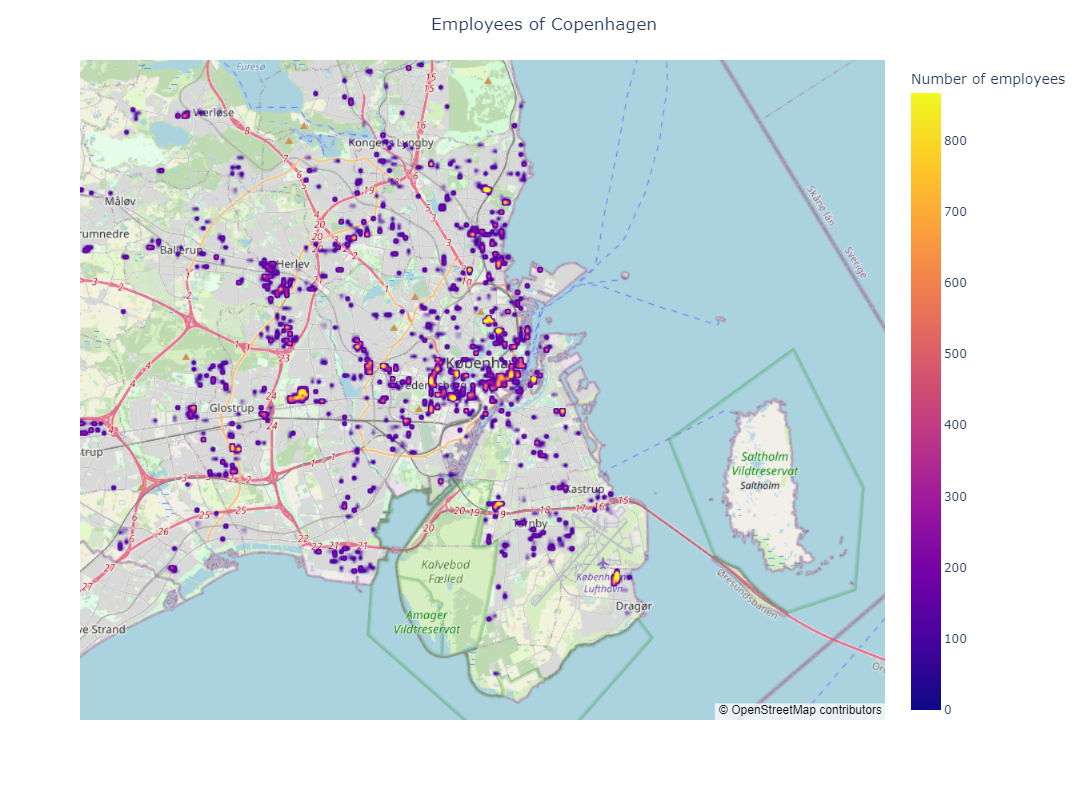

In [11]:
import plotly.express as px

#DirectorAddressLatitude
#DirectorAddressLongitude
#BusinessAddressLatitude
#BusinessAddressLongitud

#55.6761 

# Data with latitude/longitude and values
fig = px.density_mapbox(df, 
                        lat = 'BusinessAddressLatitude', 
                        lon = 'BusinessAddressLongitude',
                        z = 'NumEmployees',
                        labels={"NumEmployees": "Number of employees"},
                        radius = 3,
                        center = dict(lat = 55.6761, lon = 12.5683),
                        zoom = 10,
                        width=800, height=800,
                        mapbox_style = 'open-street-map')
plt.rcParams["figure.figsize"] = (20,20)
fig.update_layout(title_text='Employees of Copenhagen', title_x=0.5)
fig.show()

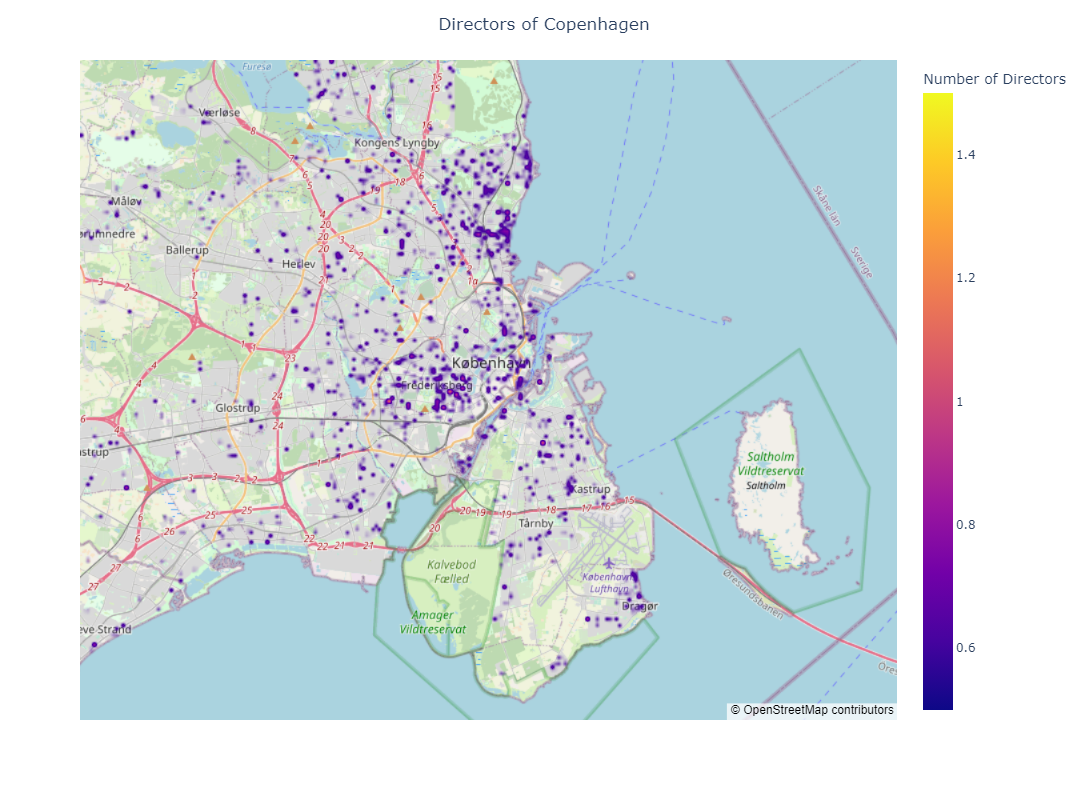

In [12]:
fig = px.density_mapbox(df, 
                        lat = 'DirectorAddressLatitude', 
                        lon = 'DirectorAddressLongitude ',
                        z = 'a',
                        labels={"a": "Number of Directors"},
                        radius = 3,
                        center = dict(lat = 55.6761, lon = 12.5683),
                        zoom = 10,
                        width=800, height=800,
                        
                        mapbox_style = 'open-street-map')
plt.rcParams["figure.figsize"] = (20,20)
fig.update_layout(title_text='Directors of Copenhagen', title_x=0.5)
fig.show()

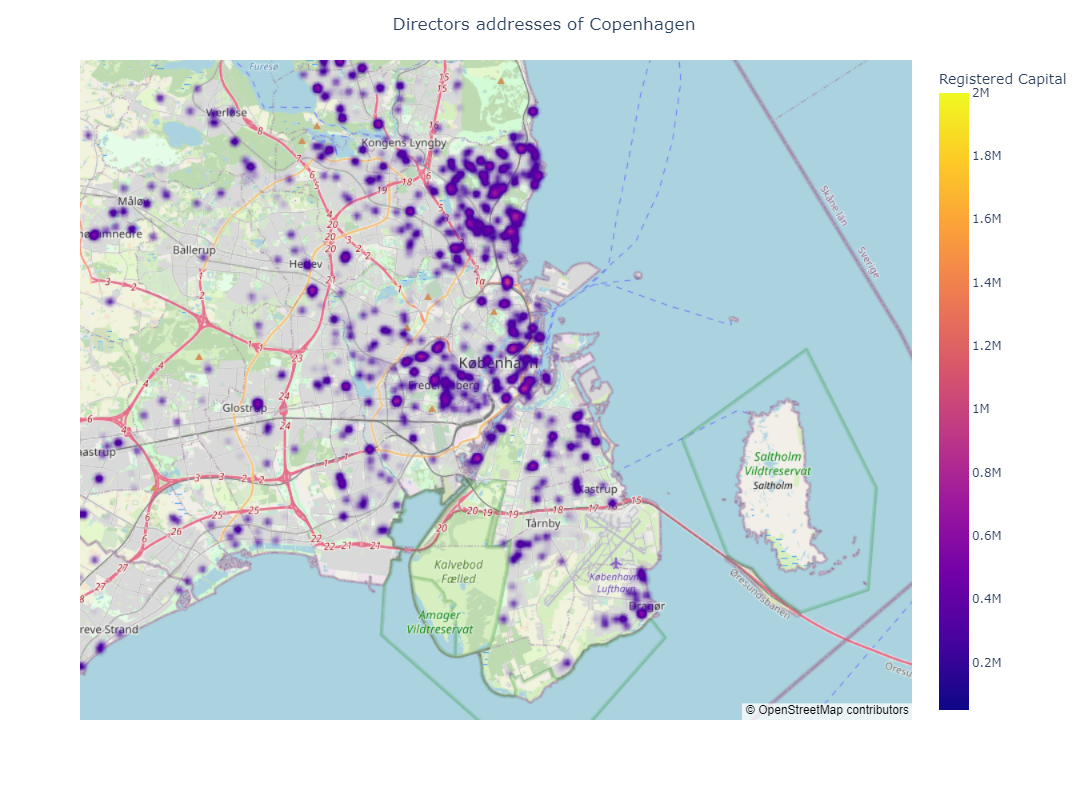

In [13]:
fig = px.density_mapbox(df.nsmallest(int(len(df) * 0.90), "RegisteredCapital"), 
                        lat = 'DirectorAddressLatitude', 
                        lon = 'DirectorAddressLongitude ',
                        z = 'RegisteredCapital',
                        radius = 8,
                        center = dict(lat = 55.6761, lon = 12.5683),
                        zoom = 10,
                        width=800, height=800,
                        labels={"RegisteredCapital": "Registered\nCapital"},
                        mapbox_style = 'open-street-map')
plt.rcParams["figure.figsize"] = (20,20)
fig.update_layout(title_text='Directors addresses of Copenhagen', title_x=0.5)
fig.show()

[Text(0.5, 0, 'Decade'), Text(0, 0.5, 'Number of companies created')]

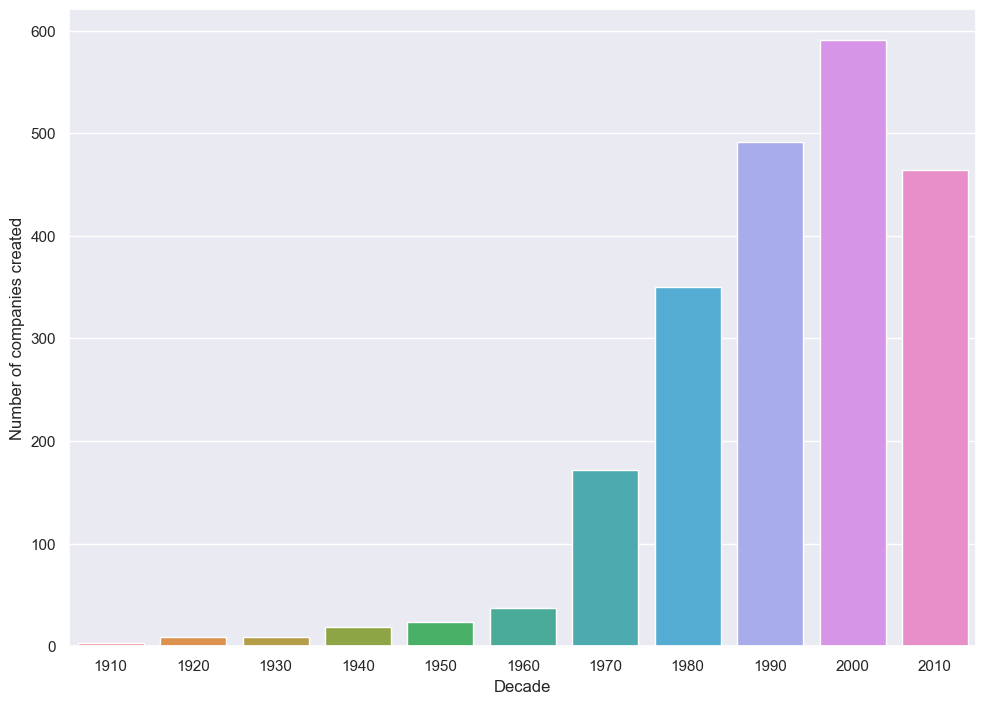

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot(df, x="StartDecade")
ax.set(xlabel='Decade', ylabel='Number of companies created')

[Text(0.5, 0, 'Decade'), Text(0, 0.5, 'Average Registered capital')]

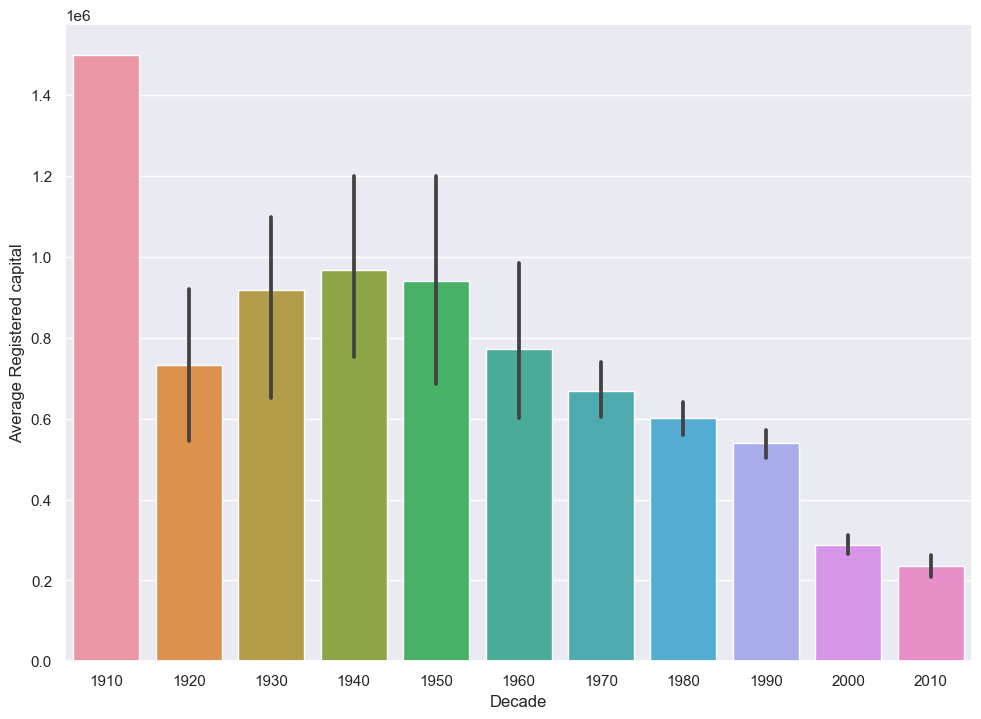

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(df.nsmallest(int(len(df)*0.9), "RegisteredCapital"), x="StartDecade", y="RegisteredCapital")
ax.set(xlabel='Decade', ylabel='Average Registered capital')

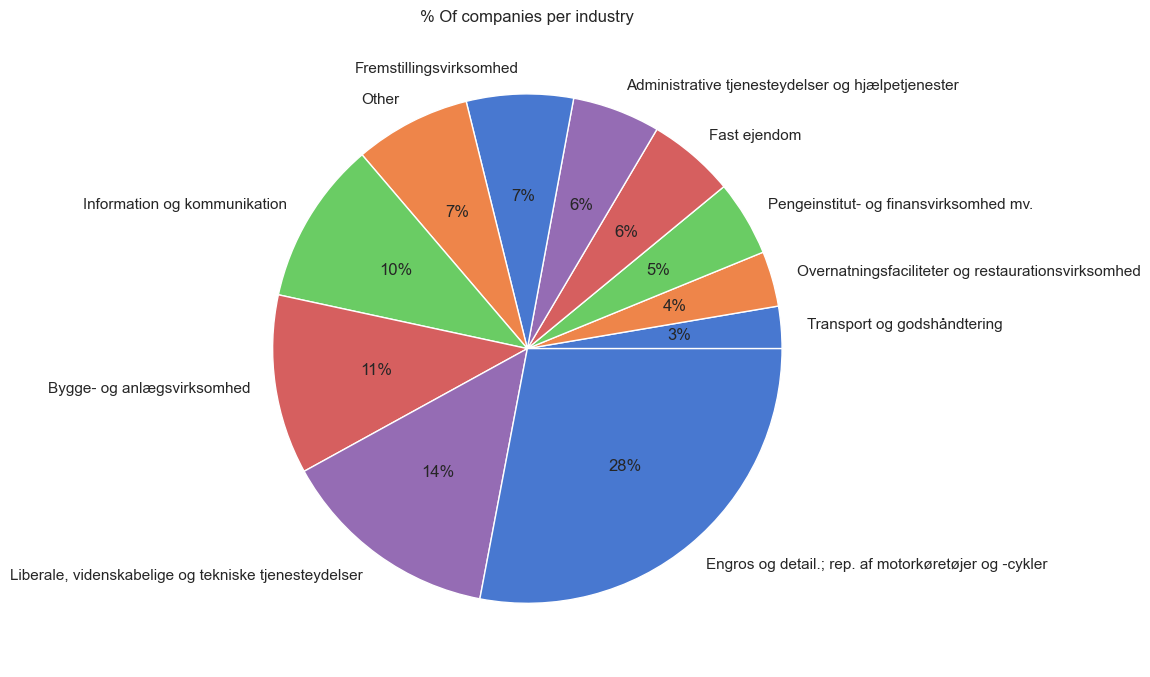

In [16]:
data = [[0, "Other"]]
labels = ["Other"]
colors = sns.color_palette('muted')[0:5]

for x in df["IndustryGroup"].unique():
    count = len(df[df["IndustryGroup"] == x])
    if count/len(df) < 0.025:
        data[0][0] = data[0][0] + count
    else:
        data.append([count, x])

data.sort(key=lambda a: a[0])

#create pie chart
plt.pie([x[0] for x in data], labels = [x[1] for x in data], colors = colors, autopct='%.0f%%')
plt.title("% Of companies per industry")
plt.show()

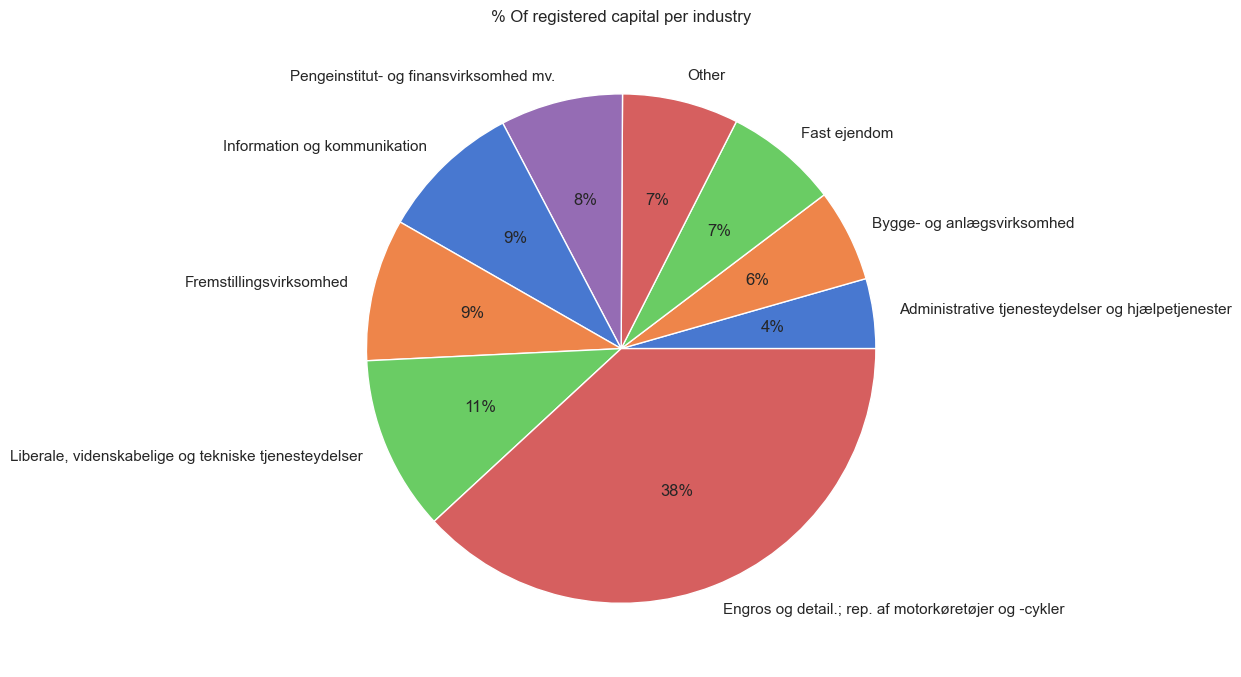

In [17]:
data = [[0, "Other"]]
labels = ["Other"]
colors = sns.color_palette('muted')[0:5]

for x in df["IndustryGroup"].unique():
    count = df[df["IndustryGroup"] == x]["RegisteredCapital"].sum()
    if count/df["RegisteredCapital"].sum() < 0.025:
        data[0][0] = data[0][0] + count
    else:
        data.append([count, x])

data.sort(key=lambda a: a[0])

#create pie chart
plt.pie([x[0] for x in data], labels = [x[1] for x in data], colors = colors, autopct='%.0f%%')
plt.title("% Of registered capital per industry")
plt.show()

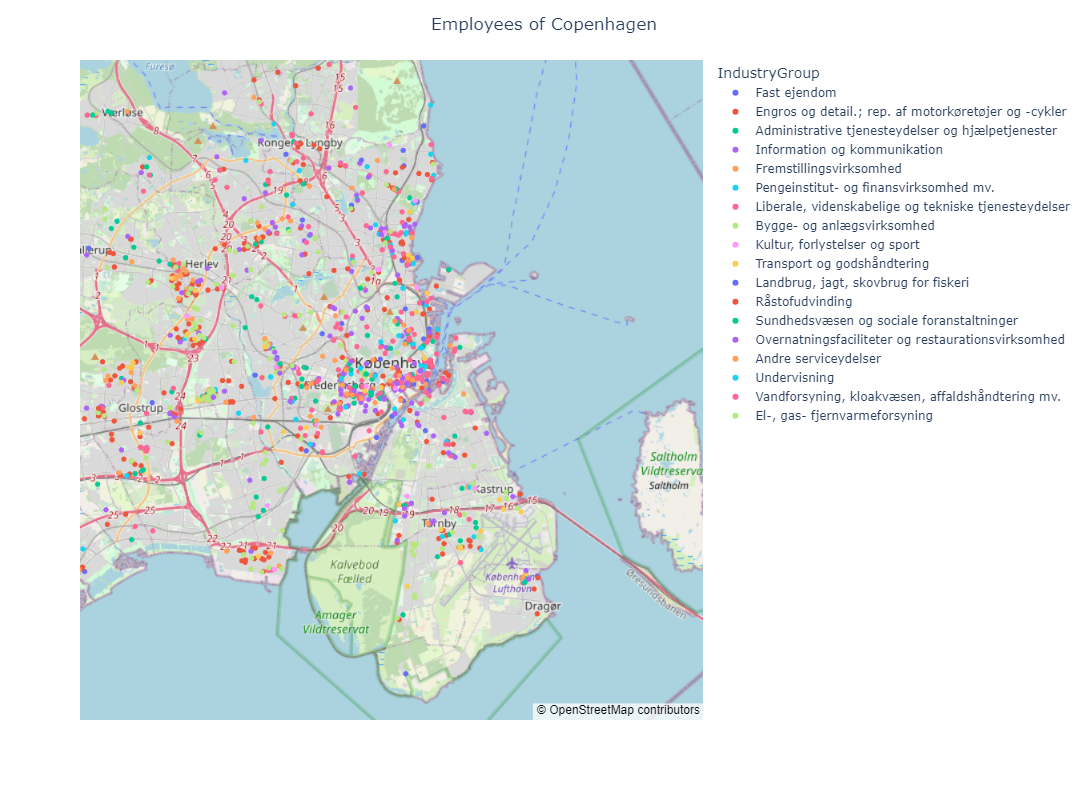

In [18]:
fig = px.scatter_mapbox(df, 
                        lat = 'BusinessAddressLatitude', 
                        lon = 'BusinessAddressLongitude',
                        #size = 'NumEmployees',
                        labels={"NumEmployees": "Number of employees"},
                        center = dict(lat = 55.6761, lon = 12.5683),
                        zoom = 10,
                        width=800, height=800,
                        color="IndustryGroup",
                        mapbox_style = 'open-street-map')
plt.rcParams["figure.figsize"] = (20,20)
fig.update_layout(title_text='Employees of Copenhagen', title_x=0.5)
fig.show()